In [1]:
import roman
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from pandas.api.types import CategoricalDtype

In [2]:
LD_table = pd.read_csv('./LD_table.csv')

In [3]:
LD_table

,SNP,1,2,3,4,5,6,7,8,9,...,12045,12046,12047,12048,12049,12050,12051,12052,12053,12054
0,1,0,0.527728,0.143989,0.000250,0.000421,0.000769,0.000003,0.000327,0.002448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,2,0,0.000000,0.214541,0.000214,0.000074,0.001374,0.000639,0.000810,0.000434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,3,0,0.000000,0.000000,0.228730,0.003859,0.008643,0.466941,0.001038,0.000026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,4,0,0.000000,0.000000,0.000000,0.248360,0.111777,0.451745,0.010595,0.010849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,5,0,0.000000,0.000000,0.000000,0.000000,0.435762,0.011791,0.025816,0.037827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12049,12050,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.202868,0.000141,0.000660,0.000391
12050,12051,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002412,0.000033,0.000033
12051,12052,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.462162,0.462162
12052,12053,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.988794


In [5]:
LDs = []
for col in tqdm(LD_table.columns[1:]):
    for LD in LD_table[col][:int(col)-1].values.tolist() :
        LDs.append(LD)

100%|██████████| 12054/12054 [00:08<00:00, 1434.06it/s]


#### LD distribution

<Figure size 425.197x425.197 with 0 Axes>

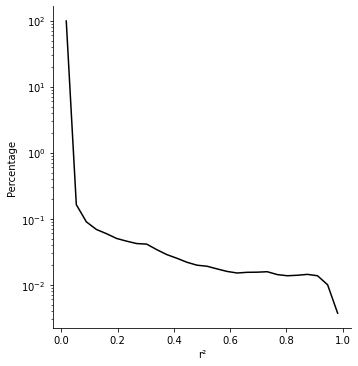

In [7]:
CM = 1/2.54 # centimeters in inches
f = plt.figure(figsize=(15 * CM, 15 * CM))
sns.displot(data=LDs, kind="hist", stat="percent", element="poly", color='black', fill=False)
plt.yscale('log')
plt.xlabel('r²')
plt.ylabel('Percentage')
plt.savefig('../../figures/figure_1/LD_distribution.eps', format='eps', dpi=300)
plt.show()

In [10]:
chr_order = CategoricalDtype(
    ['CHR_1', 
    'CHR_2', 
    'CHR_3', 
    'CHR_4', 
    'CHR_5', 
    'CHR_6', 
    'CHR_7', 
    'CHR_8', 
    'CHR_9', 
    'CHR_10', 
    'CHR_11', 
    'CHR_12', 
    'CHR_13', 
    'CHR_14', 
    'CHR_15', 
    'CHR_16', 
    'CHR_MT'], 
    ordered=True
)

def get_chr_limits(snp_position):
    #### Delimitations of chromosomes based on SNPs index
    chr_limits = []
    for chr in np.unique(snp_position['chrom'].values):
        TMP = snp_position[snp_position['chrom'] == chr]
        chr_limits.append([chr, int(TMP['snp_id'].describe()['min']), int(TMP['snp_id'].describe()['max']), int(TMP['position'].describe()['min']), int(TMP['position'].describe()['max'])])
    chr_limit_table = pd.DataFrame(chr_limits, columns=['CHR', 'SNP_IDX_FIRST', 'SNP_IDX_LAST', 'SNP_POS_FIRST', 'SNP_POS_LAST']).sort_values('SNP_IDX_FIRST')
    chr_limit_table['CHR'] = chr_limit_table['CHR'].astype(chr_order)
    print(chr_limit_table)
    return chr_limit_table

In [11]:
snp_position = pd.read_csv('../../data/genotype_information/snps_annotations_genome-version-3-64-1.txt')
chr_limits = get_chr_limits(snp_position)
chr_limits['CHR_SIZE'] = chr_limits['SNP_POS_LAST'] - chr_limits['SNP_POS_FIRST']

       CHR  SNP_IDX_FIRST  SNP_IDX_LAST  SNP_POS_FIRST  SNP_POS_LAST
0    CHR_1              1           181           1025        223059
8    CHR_2            182           886           7366        804707
9    CHR_3            887          1252            450        316065
10   CHR_4           1253          2767           2228       1523587
11   CHR_5           2768          3590           8786        566755
12   CHR_6           3591          3856          12139        270132
13   CHR_7           3857          4841            331       1073937
14   CHR_8           4842          5434          13662        556515
15   CHR_9           5435          5982          19515        437999
1   CHR_10           5983          6599          26272        745651
2   CHR_11           6600          7419            833        666544
3   CHR_12           7420          8410          11408       1062523
4   CHR_13           8411          9256           8208        914897
5   CHR_14           9257         

In [11]:
LD_table.set_index('SNP').iloc[181:886, 181:886]

,182,183,184,185,186,187,188,189,190,191,...,877,878,879,880,881,882,883,884,885,886
SNP,,,,,,,,,,,,,,,,,,,,,
182,0.0,0.000514,0.000032,0.000344,0.000344,0.000506,0.000081,0.000081,0.000014,0.000057,...,0.000923,0.000531,0.001129,2.916277e-03,0.000768,0.002589,2.022453e-03,0.000939,0.001331,0.003851
183,0.0,0.000000,0.077681,0.496728,0.496728,0.158828,0.118660,0.118660,0.097514,0.121738,...,0.005168,0.008780,0.000097,1.179753e-03,0.000006,0.000115,2.172361e-07,0.000361,0.000528,0.000213
184,0.0,0.000000,0.000000,0.096919,0.096919,0.174249,0.187677,0.187677,0.174630,0.188619,...,0.003449,0.000172,0.000939,5.883887e-04,0.000014,0.002279,7.295596e-04,0.001169,0.001454,0.001247
185,0.0,0.000000,0.000000,0.000000,0.986810,0.347113,0.266584,0.266584,0.227324,0.271309,...,0.000211,0.005421,0.000232,6.371591e-05,0.000554,0.000011,6.633989e-06,0.000423,0.000552,0.000139
186,0.0,0.000000,0.000000,0.000000,0.000000,0.355368,0.273149,0.273149,0.233013,0.277972,...,0.000211,0.005421,0.000232,7.701445e-08,0.001046,0.000011,3.219300e-05,0.000423,0.000552,0.000327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.976450e-02,0.088770,0.043085,0.292544
883,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.064344,0.000828,0.081796
884,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000002,0.080347


In [12]:
LDs_CHR = {}

for CHR in tqdm(chr_limits['CHR']):
    LDs_CHR[CHR] = []
    CHR_START = int(chr_limits[chr_limits['CHR'] == CHR]['SNP_IDX_FIRST'].values[0])
    CHR_END =  int(chr_limits[chr_limits['CHR'] == CHR]['SNP_IDX_LAST'].values[0])
    for col in tqdm(LD_table.set_index('SNP').iloc[CHR_START:CHR_END, CHR_START:CHR_END].columns):
        for LD in LD_table[col][:int(col)-1].values.tolist() :
            LDs_CHR[CHR].append(LD)


100%|██████████| 17/17 [00:18<00:00,  1.11s/it]


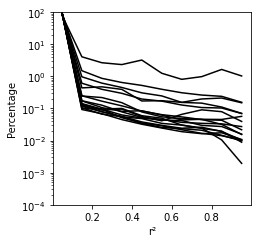

In [80]:
f, axes = plt.subplots(figsize=(9 * CM, 9 * CM), nrows=1, ncols=1, sharey=True)
for CHR in LDs_CHR.keys():
    sns.histplot(data=LDs_CHR[CHR], stat="percent", color='black', bins=10, element='poly', log_scale=(False,True), fill=False, ax=axes)
    axes.set_ylim([0.0001, 100])
    axes.set_xlabel('r²')
    axes.set_ylabel('Percentage')
    plt.savefig('../../manuscript/figures/EXT_FIGURE_1/LD_distribution_plot_chr_all.eps', format='eps', dpi=300)  # ToDo modify output path

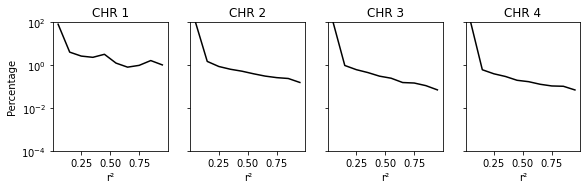

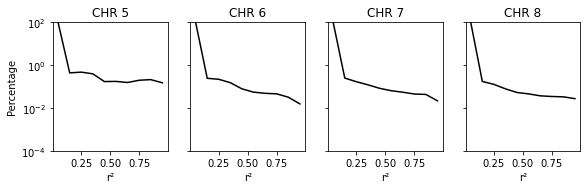

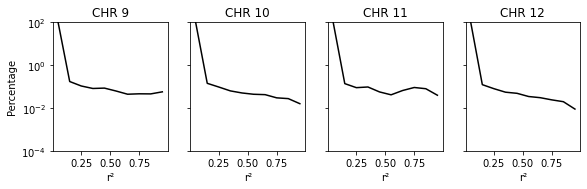

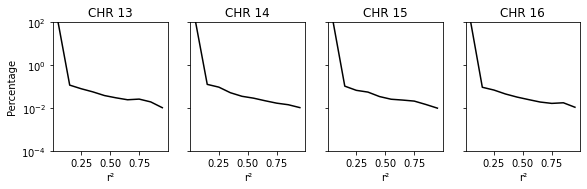

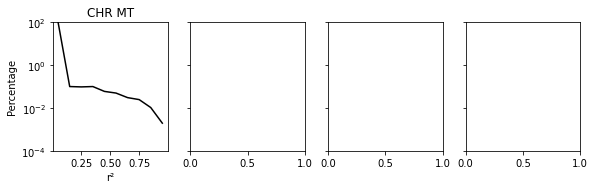

In [25]:
f, axes = plt.subplots(figsize=(24 * CM, 6 * CM), nrows=1, ncols=4, sharey=True)
i = 0
for CHR in ['CHR_1', 'CHR_2', 'CHR_3', 'CHR_4']:
    sns.histplot(data=LDs_CHR[CHR], stat="percent", color='black', bins=10, element='poly', log_scale=(False,True), fill=False, ax=axes[i])
    axes[i].set_ylim([0.0001, 100])
    axes[i].set_title(CHR.replace('_', ' '))
    axes[i].set_xlabel('r²')
    axes[i].set_ylabel('Percentage')
    i += 1
plt.savefig('../../manuscript/figures/EXT_FIGURE_1/LD_distribution_plot_chr_1-4.eps', format='eps', dpi=300)  # ToDo: modify output path

f, axes = plt.subplots(figsize=(24 * CM, 6 * CM), nrows=1, ncols=4, sharey=True)
i = 0
for CHR in ['CHR_5', 'CHR_6', 'CHR_7', 'CHR_8']:
    sns.histplot(data=LDs_CHR[CHR], stat="percent", color='black', bins=10, element='poly', log_scale=(False,True), fill=False, ax=axes[i])
    axes[i].set_ylim([0.0001, 100])
    axes[i].set_title(CHR.replace('_', ' '))
    axes[i].set_xlabel('r²')
    axes[i].set_ylabel('Percentage')
    i += 1

plt.savefig('../../manuscript/figures/EXT_FIGURE_1/LD_distribution_plot_chr_5-8.eps', format='eps', dpi=300)  # ToDo: modify output path

f, axes = plt.subplots(figsize=(24 * CM, 6 * CM), nrows=1, ncols=4, sharey=True)
i = 0
for CHR in ['CHR_9', 'CHR_10', 'CHR_11', 'CHR_12']:
    sns.histplot(data=LDs_CHR[CHR], stat="percent", color='black', bins=10, element='poly', log_scale=(False,True), fill=False, ax=axes[i])
    axes[i].set_ylim([0.0001, 100])
    axes[i].set_title(CHR.replace('_', ' '))
    axes[i].set_xlabel('r²')
    axes[i].set_ylabel('Percentage')
    i += 1

plt.savefig('../../manuscript/figures/EXT_FIGURE_1/LD_distribution_plot_chr_9-12.eps', format='eps', dpi=300)  # ToDo: modify output path

f, axes = plt.subplots(figsize=(24 * CM, 6 * CM), nrows=1, ncols=4, sharey=True)
i = 0
for CHR in ['CHR_13', 'CHR_14', 'CHR_15', 'CHR_16']:
    sns.histplot(data=LDs_CHR[CHR], stat="percent", color='black', bins=10, element='poly', log_scale=(False,True), fill=False, ax=axes[i])
    axes[i].set_ylim([0.0001, 100])
    axes[i].set_title(CHR.replace('_', ' '))
    axes[i].set_xlabel('r²')
    axes[i].set_ylabel('Percentage')
    i += 1

plt.savefig('../../manuscript/figures/EXT_FIGURE_1/LD_distribution_plot_chr_13-16.eps', format='eps', dpi=300)  # ToDo: modify output path


f, axes = plt.subplots(figsize=(24 * CM, 6 * CM), nrows=1, ncols=4, sharey=True)
i = 0
for CHR in ['CHR_MT']:
    sns.histplot(data=LDs_CHR[CHR], stat="percent", color='black', bins=10, element='poly', log_scale=(False,True), fill=False, ax=axes[i])
    axes[i].set_ylim([0.0001, 100])
    axes[i].set_title(CHR.replace('_', ' '))
    axes[i].set_xlabel('r²')
    axes[i].set_ylabel('Percentage')
    i += 1

plt.savefig('../../manuscript/figures/EXT_FIGURE_1/LD_distribution_plot_chr_17.eps', format='eps', dpi=300)  # ToDo: modify output path


<Figure size 425.197x425.197 with 0 Axes>

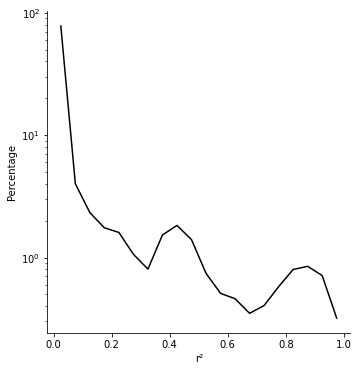

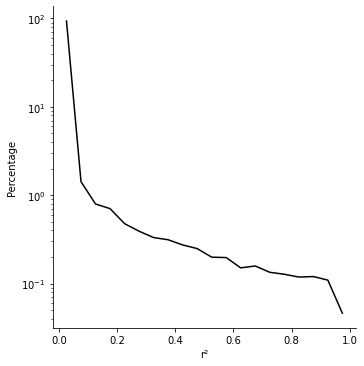

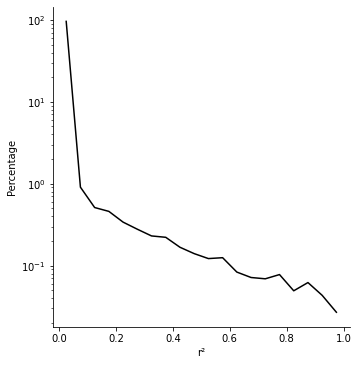

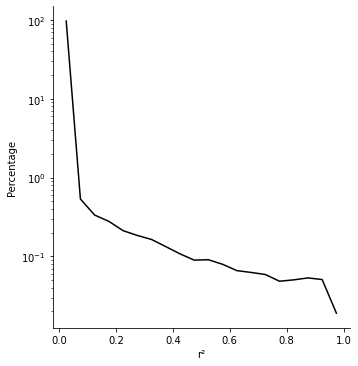

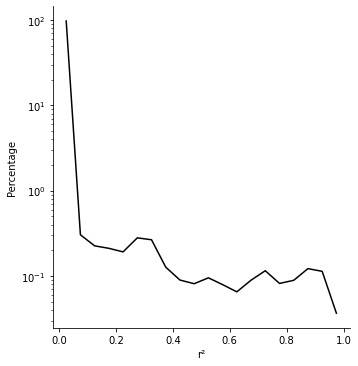

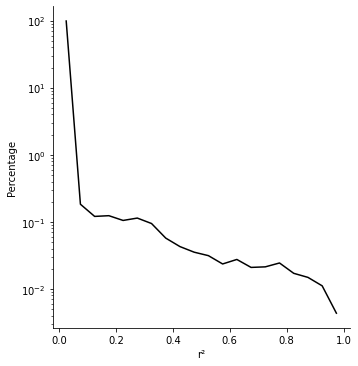

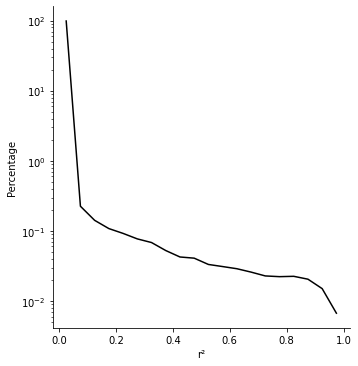

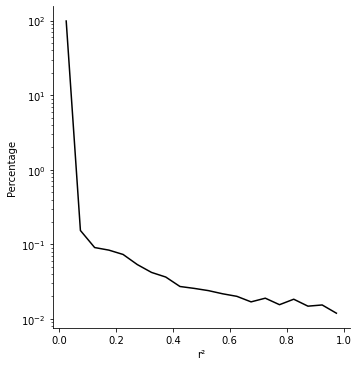

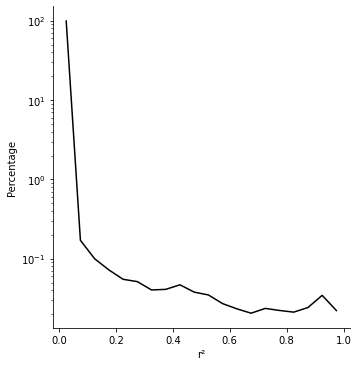

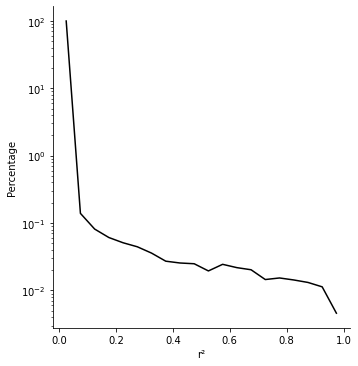

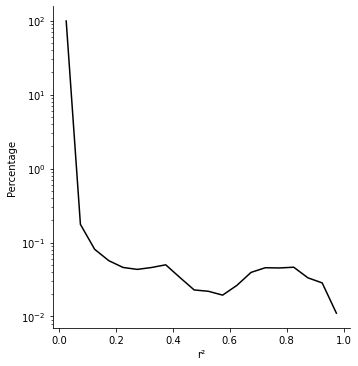

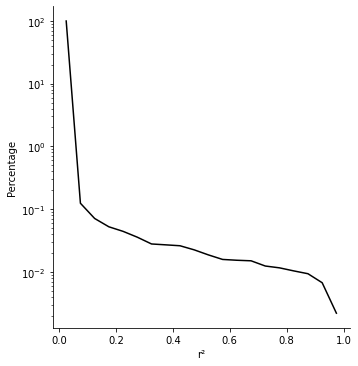

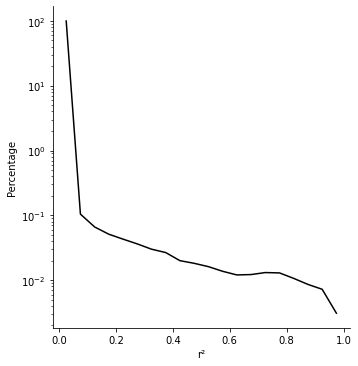

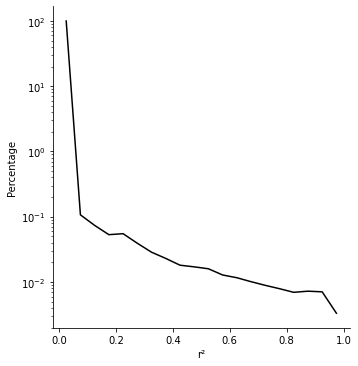

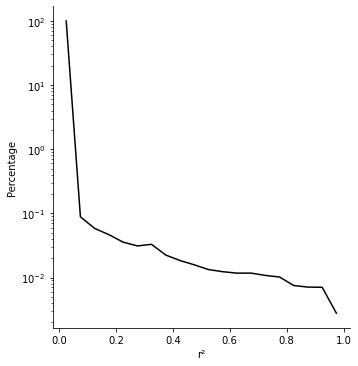

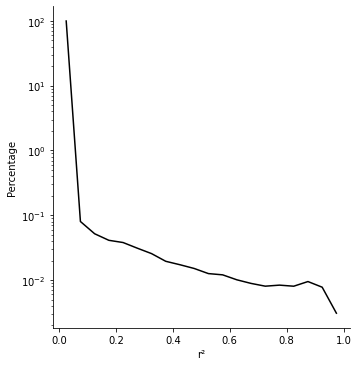

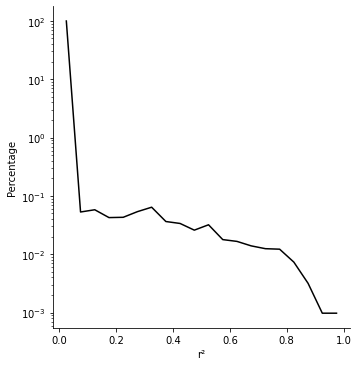

In [20]:
# CM = 1/2.54 # centimeters in inches
# f = plt.figure(figsize=(15 * CM, 15 * CM))

# for CHR in LDs_CHR.keys():
#     sns.displot(data=np.round(LDs_CHR[CHR], 5), kind="hist", stat="percent", bins=20, element="poly", color='black', fill=False)
#     plt.yscale('log')
#     plt.xlabel('r²')
#     plt.ylabel('Percentage')
#     # plt.savefig('../../manuscript/figures/EXT_FIGURE_1/LD_distribution_plot_v2.png', format='png', dpi=300)
#     # plt.savefig('../../manuscript/figures/EXT_FIGURE_1/LD_distribution_plot_v2.eps', format='eps', dpi=300)
#     plt.show()

____

#### Definition of LD blocks

In [ ]:
indpt_snps_LD = [] 

for col in tqdm(range(len(LD_table.set_index('SNP')))) :
    for row in range(len(LD_table.set_index('SNP')))  : 
        if int(col) == int(row) : 
            if LD_table.set_index('SNP').iloc[int(col)-1, int(row)] > 0.75 : 
                # print(col-1, row, LD_table.set_index('SNP').iloc[int(col)-1, int(row)])
                #### LD = 1
                indpt_snps_LD.append([int(row), 1])
            else : 
                #### LD = 0
                indpt_snps_LD.append([int(row), 0])


In [ ]:
LD_stats = pd.DataFrame(indpt_snps_LD, columns=['SNP', 'LD'])
LD_stats['SNP'] = LD_stats['SNP'] + 1

In [ ]:
# Don't run if already provided
# LD_stats.to_csv('./LD_stats.csv', index=False)

#### Creating annotations for LD blocks

In [3]:
LD_stats = pd.read_csv('./LD_stats.csv')

In [4]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

In [5]:
indpt_snps = np.array(LD_stats[LD_stats['LD'] == 0]['SNP'].values)

snp_clumps = np.array(LD_stats[LD_stats['LD'] == 1]['SNP'].values)

all_clumps = consecutive(snp_clumps, stepsize=1)

updated_clumps = []
for clump in all_clumps :
    clump = list(clump)
    if len(clump) == 1 :
        clump = list(clump)
        snp = clump[0]
        clump.insert(0, clump[0]-1)
    updated_clumps.append(clump)


In [12]:
clump_annotations = []

for i in tqdm(range(len(updated_clumps))) :
    first_snps = updated_clumps[i][0]
    start = snp_position[snp_position['snp_id'] == first_snps]['position'].values[0]
    last_snps = updated_clumps[i][-1]
    end = snp_position[snp_position['snp_id'] == last_snps]['position'].values[0]
    length = end - start
    CHR = chr_limits[chr_limits['SNP_IDX_LAST'] >= first_snps]['CHR'].values[0]

    clump_annotations.append([f'{CHR}_{updated_clumps[i][0]}-{updated_clumps[i][-1]}', CHR, ','.join([str(snp) for snp in updated_clumps[i]]), length])

100%|██████████| 1747/1747 [00:06<00:00, 286.67it/s]


In [13]:
block_length = pd.DataFrame(clump_annotations, columns=['block_ID', 'CHR','snps_IDs', 'block_size'])

In [14]:
block_length.describe()

,block_size
count,1747.000000
mean,2489.635375
std,3815.257084
min,1.000000
25%,175.000000
50%,942.000000
75%,3256.500000
max,32043.000000


In [15]:
block_length.groupby('CHR').count()

,block_ID,snps_IDs,block_size
CHR,,,
CHR_1,27,27,27
CHR_10,100,100,100
CHR_11,104,104,104
CHR_12,145,145,145
CHR_13,121,121,121
CHR_14,127,127,127
CHR_15,144,144,144
CHR_16,133,133,133
CHR_2,116,116,116


In [16]:
clump_gff_annotations = []

for i in tqdm(range(len(updated_clumps))) :
    first_snps = updated_clumps[i][0]
    start = snp_position[snp_position['snp_id'] == first_snps]['position'].values[0]
    last_snps = updated_clumps[i][-1]
    end = snp_position[snp_position['snp_id'] == last_snps]['position'].values[0]
    length = end - start
    CHR = chr_limits[chr_limits['SNP_IDX_LAST'] >= first_snps]['CHR'].values[0]

    clump_gff_annotations.append([CHR, 'LD information', 'LD block', start, end, 1, '+', '.', f'Name={CHR}_{updated_clumps[i][0]}-{updated_clumps[i][-1]}'])

100%|██████████| 1747/1747 [00:06<00:00, 280.51it/s]


In [17]:
def format_numeric_chrom(x):
    if 'MT' not in x :
        num_nb = x.replace('CHR_','')
        nb = roman.toRoman(int(num_nb))
        x = 'chr'+ str(nb)
        return x
    return 'chrXVII'

In [18]:
LD_block_annotations = pd.DataFrame(clump_gff_annotations, columns=["seqid", "source", "type", "start", "end", "score", "strand",
                        "phase", "attributes"])
LD_block_annotations.to_csv('../../data/genome_annotations/LD_blocks_annotations.csv', index=False)

In [37]:
LD_block_annotations['seqid'] = LD_block_annotations['seqid'].apply(format_numeric_chrom)
LD_block_annotations.to_csv('../../data/genome_annotations/LD_blocks.csv', header=False, index=False)

#### Add LD blocks information in SNP information table

In [39]:
snps_in_blocks = [ int(snp) for snp_list in block_length['snps_IDs'] for snp in snp_list.split(',') ]

In [40]:
real_indpt_snps = [ snp for snp in indpt_snps if snp not in snps_in_blocks ]

In [52]:
block_length

,block_ID,CHR,snps_IDs,block_size
0,CHR_1_10-11,CHR_1,"10,11",63
1,CHR_1_13-19,CHR_1,"13,14,15,16,17,18,19",1153
2,CHR_1_31-32,CHR_1,"31,32",69
3,CHR_1_38-40,CHR_1,"38,39,40",1205
4,CHR_1_42-43,CHR_1,"42,43",900
...,...,...,...,...
1742,CHR_MT_12027-12031,CHR_MT,"12027,12028,12029,12030,12031",15025
1743,CHR_MT_12033-12034,CHR_MT,"12033,12034",14
1744,CHR_MT_12035-12036,CHR_MT,"12035,12036",4
1745,CHR_MT_12037-12038,CHR_MT,"12037,12038",11


In [65]:
def inLDblock(x):
    if int(x) in snps_in_blocks :
        for idx in block_length.index :
            if str(x) in block_length['snps_IDs'][idx].split(','):
                return block_length['block_ID'][idx]
    else :
        return str(x)

In [70]:
snp_position['LD_block'] = snp_position['snp_id'].apply(inLDblock)

In [71]:
snp_position

,snp_id,chrom,position,REF,ALT,locus_id,name,sgd_id,description,snps_class_up,genome_annotations,snps_class_down,LD_block
0,1,CHR_1,1025,C,T,X1L_NFR/NDR,NaN,NaN,NaN,Promoter,Promoter,Promoter,1
1,2,CHR_1,1035,A,T,X1L_NFR/NDR,NaN,NaN,NaN,Promoter,Promoter,Promoter,2
2,3,CHR_1,1074,C,A,YAL069W,YAL069W,SGDID:S000002143,"""Dubious open reading frame; unlikely to encod...",Close to 3'-UTR,Dubious ORF,Close to 3'-UTR,3
3,4,CHR_1,1470,A,G,YAL069W,YAL069W,SGDID:S000002143,"""Dubious open reading frame; unlikely to encod...",Close to 3'-UTR,Dubious ORF,Close to 3'-UTR,4
4,5,CHR_1,1475,AT,A,YAL069W,YAL069W,SGDID:S000002143,"""Dubious open reading frame; unlikely to encod...",Close to 3'-UTR,Dubious ORF,Close to 3'-UTR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12049,12050,CHR_MT,74432,TG,T,Q0250,COX2,SGDID:S000007281,"""Subunit II of cytochrome c oxidase (Complex I...",Close to 3'-UTR,Verified ORF,Close to 3'-UTR,12050
12050,12051,CHR_MT,74433,G,GGACTA,Q0250,COX2,SGDID:S000007281,"""Subunit II of cytochrome c oxidase (Complex I...",Close to 3'-UTR,Verified ORF,Close to 3'-UTR,12051
12051,12052,CHR_MT,77708,T,"A,G",Q:77506-78088,NaN,NaN,between YNCQ0023W and YNCQ0024C,Intergenic region,Intergenic region,Intergenic region,12052
12052,12053,CHR_MT,84245,G,"GCC,GTC",Q:82601-85034,NaN,NaN,between ORI5 and YNCQ0026W,Intergenic region,Intergenic region,Intergenic region,CHR_MT_12053-12054


In [72]:
snp_position.to_csv('../../data/genotype_information/snps_annotations_genome-version-3-64-1_LD_annotated.txt', index=False)

#### Statistic of LD blocks

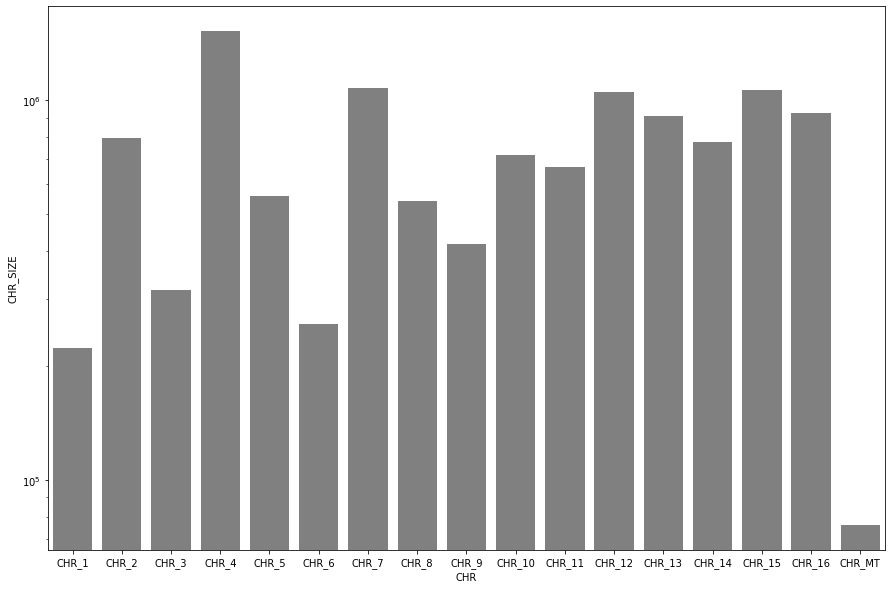

In [45]:
f = plt.figure(figsize=(15,10))
sns.barplot(x=chr_limits['CHR'], y=chr_limits['CHR_SIZE'], color='grey')
plt.yscale('log')

Text(0, 0.5, 'LD block size - log(pb)')

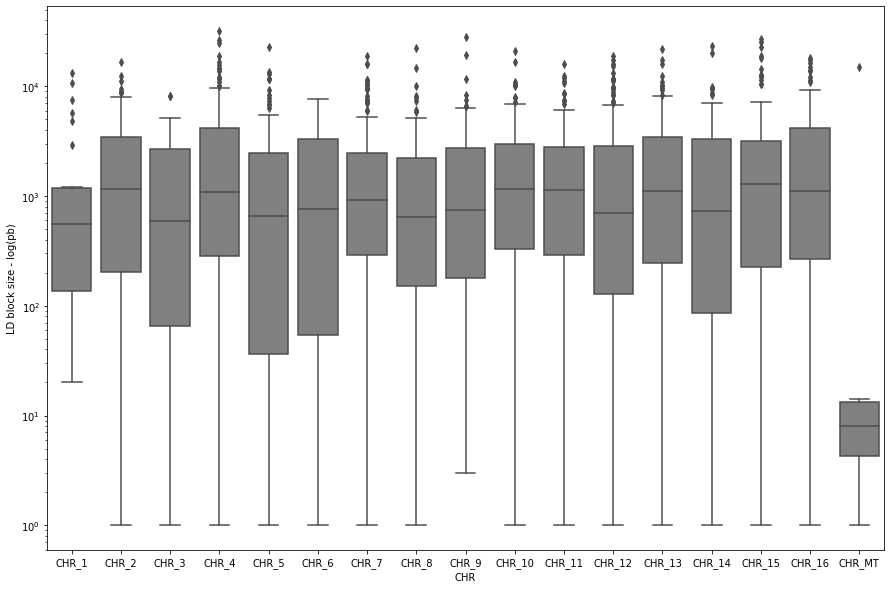

In [48]:
f = plt.figure(figsize=(15,10))
sns.boxplot(x=block_length['CHR'], y=block_length['block_size'], color='grey')
plt.yscale('log')
plt.ylabel('LD block size - log(pb)')